In [1]:
import PauLisa as pl, PL_Plot as plplt,plback as plb, Tophat_integration_AW as th, numpy as np, matplotlib.pyplot as plt, cmath as cm
from Signals import *

from numpy import pi as pi
from numpy import angle
from math import e
from numpy import sqrt as sqrt
from scipy.special import erf as erf
import mpmath as mp
import scipy.io

from math import pi, log, exp, sin, cos, atan, e, radians, degrees
from scipy.special import gamma as gamma
from scipy.special import erf as erf
from math import factorial as fact
import cmath
from cmath import sqrt as sqrt
import numpy as np

from time import process_time

inf=np.inf

import pandas as pd
from pprint import pprint


## Tophat coeffients from AW

In [2]:
# mat = scipy.io.loadmat('Top_hat_for_paul.mat')
mat = scipy.io.loadmat('paul_coef_file.mat')
for x in mat:
  print(x)
coef=mat['coeftopUnitInt'].ravel()
print(mat['readmepaul'])
# coef=mat['coeftop'].ravel()

def N_f(A):
    
    res = np.floor((np.sqrt(8*A+1)-1)/2)
    
    #res = (np.sqrt(9+8*A)-3)/2
    return(res)

def m(N,A):
    res = (N+1)*(N+2)/2 - (A+1)
    return(res)

#def n(N,A):
#    m= (N+1)*(N+2)/2 - (A+1)
#    res = N-m
#    return(res)
def n(N,A):
    res = A - (N*(N+1)/2)
    return(res)

NumberModes = int(len(coef))
listModesN = [None] * NumberModes
listModesM = [None] * NumberModes
listModesC = [None] * NumberModes

area = pi*1e-3**2

#for i in range(len(coef)):
#    A=i
#    N= N_f(A)
#
#    if (m(N,A)%2 == 0) & (n(N,A)%2 == 0):
#        print(coef[A], '\t\t\t' , m(N,A), ',' , n(N,A))

for i in range(NumberModes):
    A=i
    N= N_f(A)
    listModesN[i] = int(m(N,A))
    listModesM[i] = int(n(N,A))
    listModesC[i] = coef[i]
    


__header__
__version__
__globals__
coeftopUnitInt
coeftopUnitPow
readmepaul
['Two tophat coefficient variables, one for unit power and one for \n unit intensity, should be clear from the name which is which.\nAgain these assume a waist 1/3 of a mm.']


In [22]:


modes = pl.create_modes(listModesM,listModesN,listModesC,NumberModes)

# modes = plb.modes((34,0,1),(1,0,1),(0,34,1),(3,0,1),(0,2,1))
modes = plb.modes((0,0,1))
# modes = plb.modes((1,0,1))

N=28 # mode order
modes_N= pl.create_modes_orderN(listModesM,listModesN,listModesC,NumberModes,N)


plane = pl.Plane(-1.5e-3,1.5e-3,100,-1.5e-3,1.5e-3,100)
z=0e-3
a = 100e-6
alpha = 0e-6
params = pl.Params(1064e-9,1e-3,0)
new_modes = rotate_RX_2(z,params,a,alpha,modes)
pl.show_modes(modes)
pl.show_modes(new_modes)

n\m [0]
0   [1]
n\m [0, 1, 2, 3]
0   [(1+0j), 0, 0, 0]
1   [(0.1+0j), 0, 0, 0]
2   [0j, 0, 0, 0]
3   [0j, 0, 0, 0]


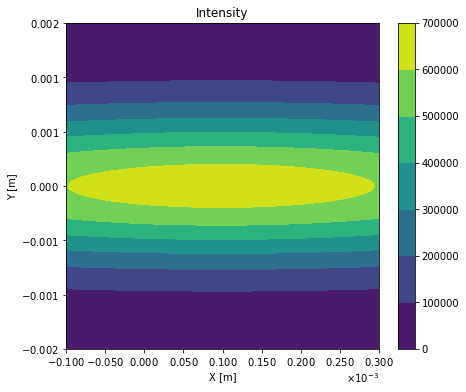

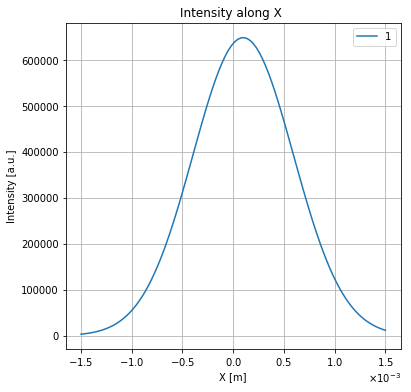

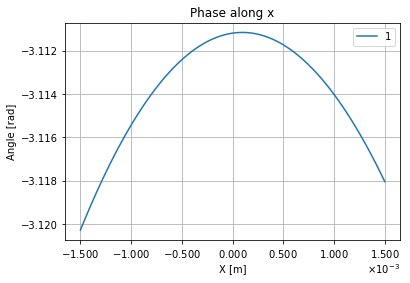

In [14]:
f = pl.calculate(params,plane,new_modes,z)
plplt.Contour(f,xlim=[-1e-4,3e-4])
plplt.intslicex(0,f)
plplt.phaseslicex(0,f)